## Intro to neurons

At this point, we know how to build models and have a computer automatically learn how to match the model to data. This is the core of how any machine learning method works. 

Now, let's narrow our focus and look at **neural networks**. Neural networks (or "neural nets", for short) are a specific choice of a **model**. It's a network made up of **neurons**; this, in turn, leads to the question, "what is a neuron?"

### Models with multiple inputs

So far, we have been using the sigmoid function as our model. One of the forms of the sigmoid function we've used is

$$\sigma_{w, b}(x) = \frac{1}{1 + \exp(-wx + b)},$$

where `x` and `w` are both single numbers. We have been using this function to model how the amount of the color green in an image (`x`) can be used to determine if an image shows an apple or a banana. 

But what if we had multiple data features we wanted to fit? 

We could then extend our model to include multiple features like

$$\sigma_{\mathbf{w},b}(\mathbf{x}) = \frac{1}{1 + \exp(-w_1 x_1 - w_2 x_2 - \cdots - w_n x_n + b)}$$

Note that now $\mathbf{x}$ and $\mathbf{w}$ are vectors with many components, rather than a single number. 

For example, $x_1$ might be the amount of the color green in an image, $x_2$ could be the height of the object in the picture, $x_3$ could be the width, and so forth. We can add information for as many features as we have! Our model now has more parameters, but the same idea of gradient descent ("rolling the ball downhill") will still work to train our model.

This version of the sigmoid model that takes multiple inputs is an example of a **neuron**.

In the video, we see that one huge class of learning techniques is based around neurons, that is, *artificial neurons*. These are caricatures of real, biological neurons. Both *artificial* and *biological* neurons have several inputs $x_1, \ldots, x_n$, and a single output, $y$. Schematically they look like this:

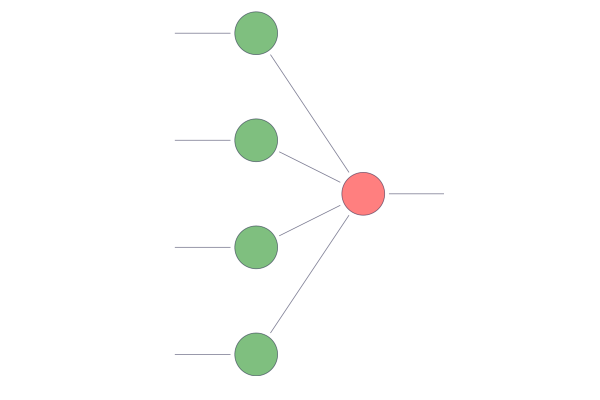

In [1]:
include("draw_neural_net.jl")

number_inputs, number_neurons = 4, 1

draw_network([number_inputs, number_neurons])

We should read this as showing how information flows from left to right: 
- 4 pieces of input information arrive (shown in green on the left);

- the neuron (shown in red on the right) receives all the inputs, processes them, and outputs a single number to the right.

In other words, a neuron is just a type of function that takes multiple inputs and returns a single output.

The simplest interesting case that we will look at in this notebook is when there are just two pieces of input data:

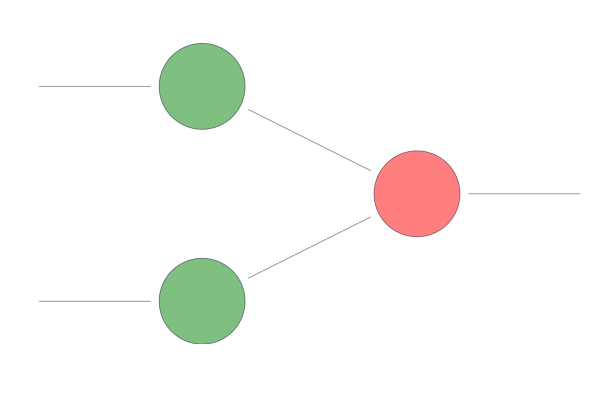

In [2]:
draw_network([2, 1])

Each link between circles above represents a **weight** $w$ that can be modified to allow the neuron to learn, so in this case the neuron has two weights, $w_1$ and $w_2$. 

The neuron also has a single bias $b$, and an **activation function**, which we will take to be the $\sigma$ sigmoidal function that we have been using. (Note that other activation functions can be used!)

Let's call our neuron $f_{w_1,w_2, b}(x_1, x_2)$, where

$$f_{w_1,w_2, b}(x_1, x_2) := \sigma(w_1 x_1 + w_2 x_2 + b).$$

Note that $f_{w_1,w_2, b}(x_1, x_2)$ has 3 parameters: two weights and a bias.

To simplify the notation, and to prepare for more complicated scenarios later, we put the two weights into a vector, and the two data values into another vector:

$$
\mathbf{w} = \begin{pmatrix} w_1 \\ w_2 \end{pmatrix};
\qquad
\mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}.
$$

We thus have

$$f_{\mathbf{w}, b}(\mathbf{x}) = \sigma(\mathbf{w} \cdot \mathbf{x} + b),$$

where the dot product $\mathbf{w} \cdot \mathbf{x}$ is an abbreviated syntax for $w_1 x_1 + w_2 x_2$.

#### Exercise 1

Declare the function `f(x, w, b)` in Julia. `f` should take vectors `x` and `w` as vectors and `b` as a scalar. Furthermore `f` should call

```julia
σ(x) = 1 / (1 + exp(-x))
```

What output do you get for

```julia
f(3, 4, 5)
```
?

#### Solution

The code we need is
```julia
σ(x) = 1 / (1 + exp(-x))
f(x, w, b) = σ(w ⋅ x + b)   # use \cdot<TAB> to get "⋅"
```
or alternatively

```julia
σ(x) = 1 / (1 + exp(-x))
f(x, w, b) = σ(w'x + b)   # use \cdot<TAB> to get "⋅"
```

Upon evaluating
```julia
f(3, 4, 5)
```
you should get approximately `0.9999999586006244`.